In [24]:
from HodaDatasetReader.HodaDatasetReader import *
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random
import numpy

print('Load train images')
x_train, y_train = read_hoda_dataset(dataset_path='HodaDatasetReader/DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)


print('Load test images')
x_test, y_test = read_hoda_dataset(dataset_path='HodaDatasetReader/DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)


Load train images
Load test images


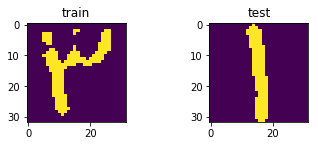

In [25]:
### a


img1 = plt.subplot(221)
train_index = random.randint(0, len(x_train))
test_index = random.randint(0, len(y_test))
img1.set_title('train')
plt.imshow(x_train[train_index].reshape(32,32))
img2 = plt.subplot(222)
plt.imshow(x_train[test_index].reshape(32,32))
img2.set_title('test')

# show the plot
plt.show()

In [26]:
### b


X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

# one hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

# create model
model = Sequential()
model.add(Dense(400, input_shape=(32 * 32,), activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





In [27]:
# Fit the model
h = model.fit(X_train, Y_train, epochs=10, batch_size=200)
# Final evaluation of the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Train acc : ", train_acc)
print("Test acc : ", test_acc)

Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.3424 - acc: 0.8098
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3609 - acc: 0.9135
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2476 - acc: 0.9347
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2078 - acc: 0.9433
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1864 - acc: 0.9491
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1729 - acc: 0.9528
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1636 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1565 - acc: 0.9571
Epoch 9/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.1509 - acc: 0.9592
Epoch 10/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.1458 - acc: 0.9602

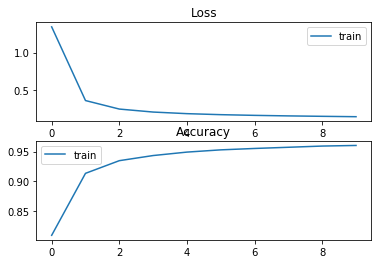

20000/20000 [==============================] - 0s 19us/step
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2000
         1.0       0.89      0.97      0.93      2000
         2.0       0.83      0.85      0.84      2000
         3.0       0.90      0.84      0.87      2000
         4.0       0.87      0.89      0.88      2000
         5.0       0.96      0.96      0.96      2000
         6.0       0.90      0.91      0.90      2000
         7.0       0.98      0.94      0.96      2000
         8.0       0.97      0.94      0.95      2000
         9.0       0.92      0.90      0.91      2000

   micro avg       0.92      0.92      0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [28]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(h.history['acc'], label='train')
plt.legend()

plt.show()

Y_pred = model.predict(X_test, batch_size=200, verbose=1)
# print(Y_pred)
# print(Y_test)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(y_test, Y_pred_bool))

Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 1.3692 - acc: 0.7903
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.4121 - acc: 0.8959
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2854 - acc: 0.9223
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2374 - acc: 0.9332
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2123 - acc: 0.9402
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1956 - acc: 0.9450
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1818 - acc: 0.9491
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1729 - acc: 0.9517
Epoch 9/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1633 - acc: 0.9541
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1551 - acc: 0.9573

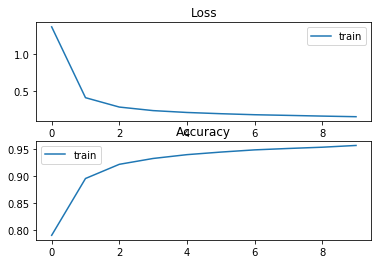

20000/20000 [==============================] - 0s 22us/step
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2000
         1.0       0.91      0.97      0.94      2000
         2.0       0.83      0.85      0.84      2000
         3.0       0.89      0.85      0.87      2000
         4.0       0.89      0.88      0.88      2000
         5.0       0.96      0.97      0.96      2000
         6.0       0.91      0.90      0.91      2000
         7.0       0.98      0.94      0.96      2000
         8.0       0.97      0.93      0.95      2000
         9.0       0.91      0.92      0.91      2000

   micro avg       0.92      0.92      0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [29]:
### c


# create model
model = Sequential()
model.add(Dense(400, input_shape=(32 * 32,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h = model.fit(X_train, Y_train, epochs=10, batch_size=200)
# Final evaluation of the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Train acc : ", train_acc)
print("Test acc : ", test_acc)

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(h.history['acc'], label='train')
plt.legend()

plt.show()

Y_pred = model.predict(X_test, batch_size=200, verbose=1)
# print(Y_pred)
# print(Y_test)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(y_test, Y_pred_bool))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 49us/step - loss: 1.5365 - acc: 0.7980 - val_loss: 0.6491 - val_acc: 0.8765
Epoch 2/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.4439 - acc: 0.9000 - val_loss: 0.3357 - val_acc: 0.9149
Epoch 3/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.2848 - acc: 0.9262 - val_loss: 0.2554 - val_acc: 0.9350
Epoch 4/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2309 - acc: 0.9380 - val_loss: 0.2212 - val_acc: 0.9402
Epoch 5/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.2036 - acc: 0.9440 - val_loss: 0.2010 - val_acc: 0.9445
Epoch 6/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.1867 - acc: 0.9480 - val_loss: 0.1891 - val_acc: 0.9481
Epoch 7/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.1754 - acc: 0.9510 - val_loss: 0.1781 - val_acc

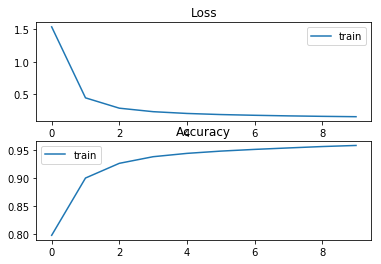

20000/20000 [==============================] - 0s 23us/step
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2000
         1.0       0.89      0.97      0.93      2000
         2.0       0.81      0.83      0.82      2000
         3.0       0.87      0.86      0.86      2000
         4.0       0.89      0.85      0.87      2000
         5.0       0.96      0.96      0.96      2000
         6.0       0.89      0.90      0.90      2000
         7.0       0.98      0.93      0.95      2000
         8.0       0.97      0.93      0.95      2000
         9.0       0.92      0.90      0.91      2000

   micro avg       0.91      0.91      0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [30]:
### d


# create model
model = Sequential()
model.add(Dense(400, input_shape=(32 * 32,), activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h = model.fit(X_train, Y_train, epochs=10, batch_size=200, validation_split=0.2)
# Final evaluation of the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Train acc : ", train_acc)
print("Test acc : ", test_acc)

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(h.history['acc'], label='train')
plt.legend()

plt.show()

Y_pred = model.predict(X_test, batch_size=200, verbose=1)
# print(Y_pred)
# print(Y_test)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(y_test, Y_pred_bool))

Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 2.0518 - acc: 0.7226
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.9038 - acc: 0.8645
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.4578 - acc: 0.9007
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3309 - acc: 0.9190
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2731 - acc: 0.9300
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2399 - acc: 0.9370
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2177 - acc: 0.9415
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2030 - acc: 0.9448
Epoch 9/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1911 - acc: 0.9475
Epoch 10/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1819 - acc: 0.9503

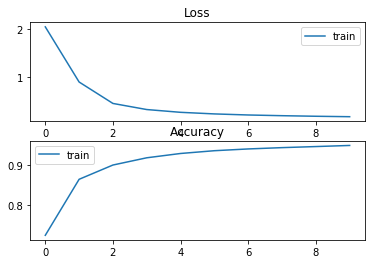

20000/20000 [==============================] - 0s 19us/step
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2000
         1.0       0.89      0.96      0.92      2000
         2.0       0.78      0.81      0.79      2000
         3.0       0.85      0.83      0.84      2000
         4.0       0.88      0.84      0.86      2000
         5.0       0.95      0.96      0.96      2000
         6.0       0.88      0.88      0.88      2000
         7.0       0.97      0.92      0.94      2000
         8.0       0.95      0.94      0.94      2000
         9.0       0.91      0.89      0.90      2000

   micro avg       0.90      0.90      0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [31]:
### e

# create model
model = Sequential()
model.add(Dense(400, input_shape=(32 * 32,), activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h = model.fit(X_train, Y_train, epochs=10, batch_size=500)
# Final evaluation of the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Train acc : ", train_acc)
print("Test acc : ", test_acc)

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(h.history['acc'], label='train')
plt.legend()

plt.show()

Y_pred = model.predict(X_test, batch_size=500, verbose=1)
# print(Y_pred)
# print(Y_test)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(y_test, Y_pred_bool))